<a href="https://colab.research.google.com/github/anjaleeDS/CS06/blob/main/Lab2_scatter_%26_bars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scatterplots



## Load and look at data

In [2]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt

# data.list_datasets()

# get data
df = data.cars()

# look at data and select which dimensions you want to plot
df.dtypes, df.shape, df.head()



(Name                        object
 Miles_per_Gallon           float64
 Cylinders                    int64
 Displacement               float64
 Horsepower                 float64
 Weight_in_lbs                int64
 Acceleration               float64
 Year                datetime64[ns]
 Origin                      object
 dtype: object,
 (406, 9),
                         Name  Miles_per_Gallon  Cylinders  Displacement  \
 0  chevrolet chevelle malibu              18.0          8         307.0   
 1          buick skylark 320              15.0          8         350.0   
 2         plymouth satellite              18.0          8         318.0   
 3              amc rebel sst              16.0          8         304.0   
 4                ford torino              17.0          8         302.0   
 
    Horsepower  Weight_in_lbs  Acceleration       Year Origin  
 0       130.0           3504          12.0 1970-01-01    USA  
 1       165.0           3693          11.5 1970-01-01    USA  

##Scatterplots

Template:
- get data and adjust plot settings
- look at data and select which dimensions you want to plot
- title the plot, summary if needed and label the x and y axes
- if needed, update x & y axes with increments that make sense
- show plot

[pyplot reference](https://matplotlib.org/stable/api/pyplot_summary.html)

### Scatter plots with matplotlib.pyplot

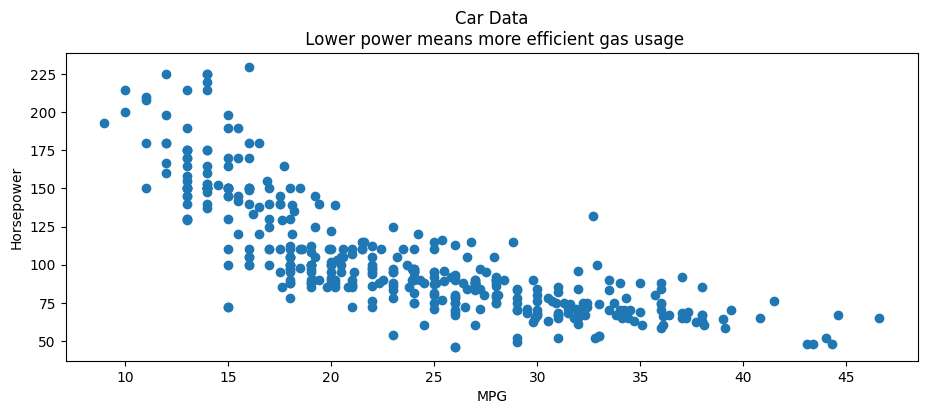

In [133]:
# establish size of plot and select data

plt.figure(figsize = (11,4))
plt.scatter(x=df['Miles_per_Gallon'], y=df['Horsepower'])

# label title (with summary), x,y

plt.title("Car Data\n Lower power means more efficient gas usage")
plt.xlabel("MPG")
plt.ylabel("Horsepower")

plt.show() # this isn't necessary, so what happens when you take it out?

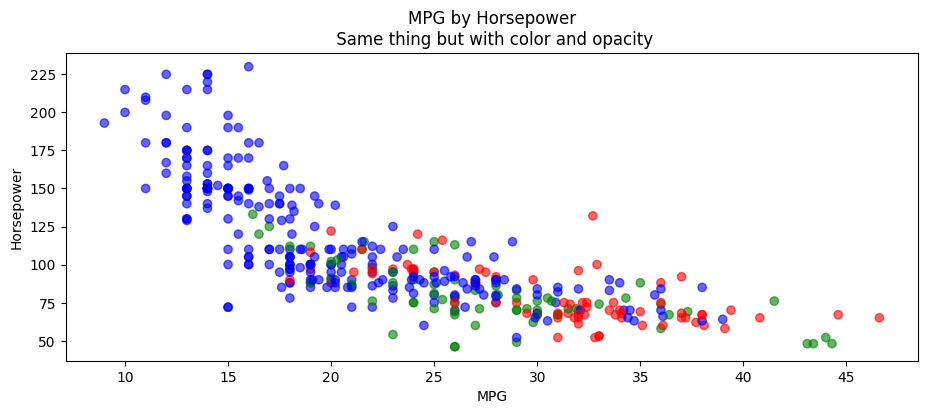

In [153]:
# adding another dimension, Origin (nominal) using color and a lighter transparency to see overlap

df['Origin'].value_counts() #Start by seeing how many distinct origins there are
colors = {'USA': 'blue', 'Europe': 'green', 'Japan': 'red'} #assigning each Origin value with a color


plt.figure(figsize = (11,4))
plt.scatter(x=df['Miles_per_Gallon'], y=df['Horsepower'], c=df['Origin'].map(colors), alpha=0.6)

plt.title("MPG by Horsepower\n Same thing but with color and opacity")
plt.xlabel("MPG")
plt.ylabel("Horsepower")

plt.show()

### Multiple Scatterplots?
Use the ax option to get more control of what to show.

[plt gallery - scatter plot with more than 1 graph](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)

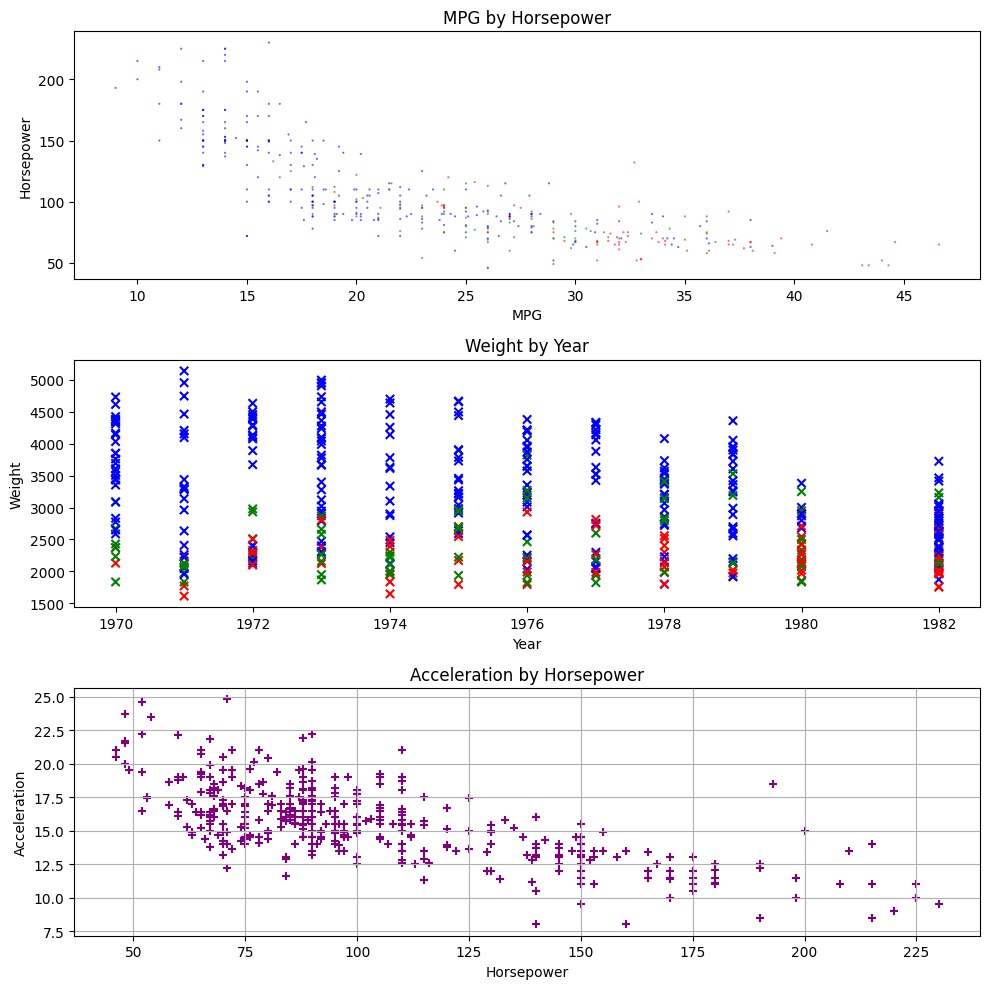

In [163]:
# multiple plots using matplotlib

fig, ax = plt.subplots(nrows=3,ncols=1, figsize = (10,10))

colors = {'USA': 'blue', 'Europe': 'green', 'Japan': 'red'} #assigning each Origin value with a color
## Graph 1
ax[0].scatter(x=df['Miles_per_Gallon'], y=df['Horsepower'], c=df['Origin'].map(colors), alpha=0.6,s=0.3)
ax[0].set_title("MPG by Horsepower")
ax[0].set_xlabel("MPG")
ax[0].set_ylabel("Horsepower")

## Graph 2
ax[1].scatter(x=df['Year'], y=df['Weight_in_lbs'], c=df['Origin'].map(colors), marker=("x"))
ax[1].set_title("Weight by Year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Weight")

## Graph3
ax[2].scatter(x=df['Horsepower'], y=df['Acceleration'], c='purple', marker="+")
ax[2].set_title("Acceleration by Horsepower")
ax[2].set_xlabel("Horsepower")
ax[2].set_ylabel("Acceleration")
ax[2].grid()

plt.tight_layout()
plt.show()

### Scatter plots with Seaborn

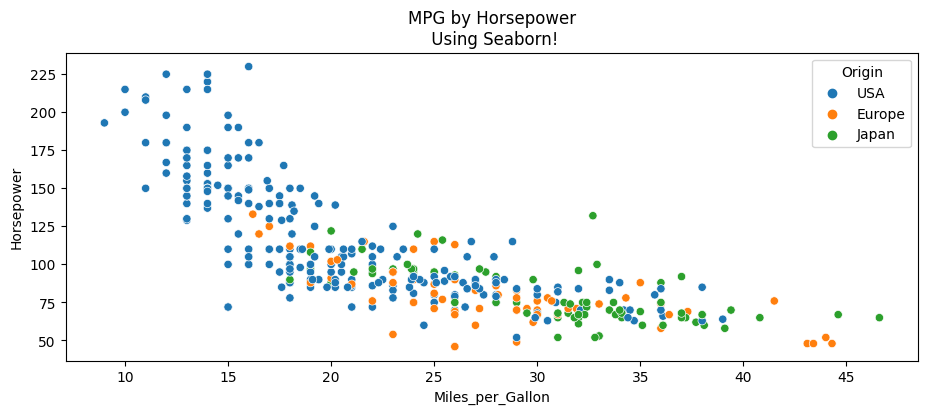

In [156]:
plt.figure(figsize=(11,4))
sns.scatterplot(data= df, x='Miles_per_Gallon',y='Horsepower',hue='Origin')

# you get the axes labels and legend for free!
plt.title("MPG by Horsepower\n Using Seaborn!")
plt.show()

### Seaborn also is able to do multiple scatterplots with relplot (relational plots)

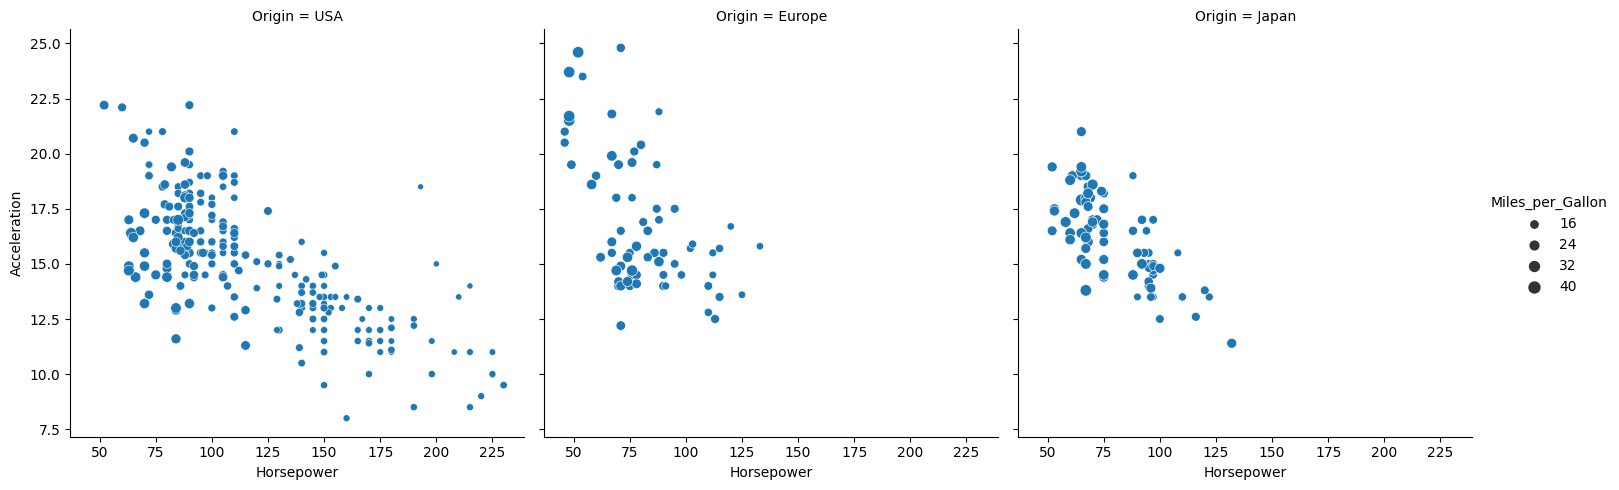

In [205]:
sns.relplot(data=df, x='Horsepower', y='Acceleration', kind = 'scatter', col='Origin', size='Miles_per_Gallon')

plt.show()

# Bars and boxes

## Load and look at data

In [3]:
import pandas as pd
from vega_datasets import data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# get data from seaborn and look around
sns.get_dataset_names() # how to look at all the datasets in seaborn

df_b = sns.load_dataset('tips')
df_b.shape, df_b.dtypes, df_b.isnull().sum()
# the df.isnull().sum() means "in the dataframe, get me all the cells that have null or NaN as their value and sum it up"

((244, 7),
 total_bill     float64
 tip            float64
 sex           category
 smoker        category
 day           category
 time          category
 size             int64
 dtype: object,
 total_bill    0
 tip           0
 sex           0
 smoker        0
 day           0
 time          0
 size          0
 dtype: int64)

In [4]:
df_b.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## bars using matplotlib

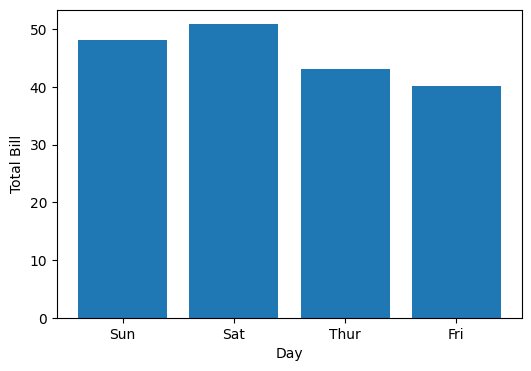

In [190]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(x=df_b['day'],height=df_b['total_bill'])

plt.ylabel("Total Bill")
plt.xlabel("Day")

plt.show()

## bars using seaborn

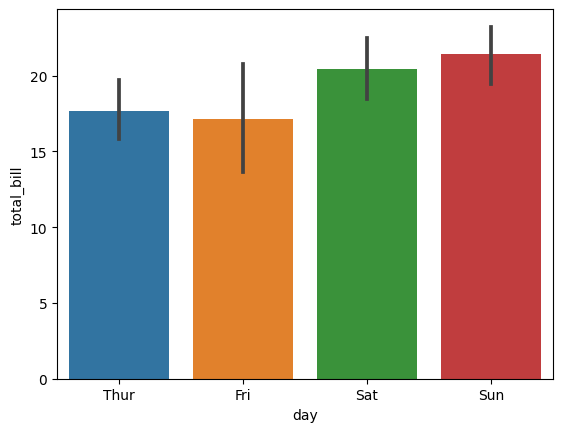

In [176]:
sns.barplot(y=df_b['total_bill'], x=df_b['day'])


### Distributions with seaborn

<Axes: xlabel='tip', ylabel='Count'>

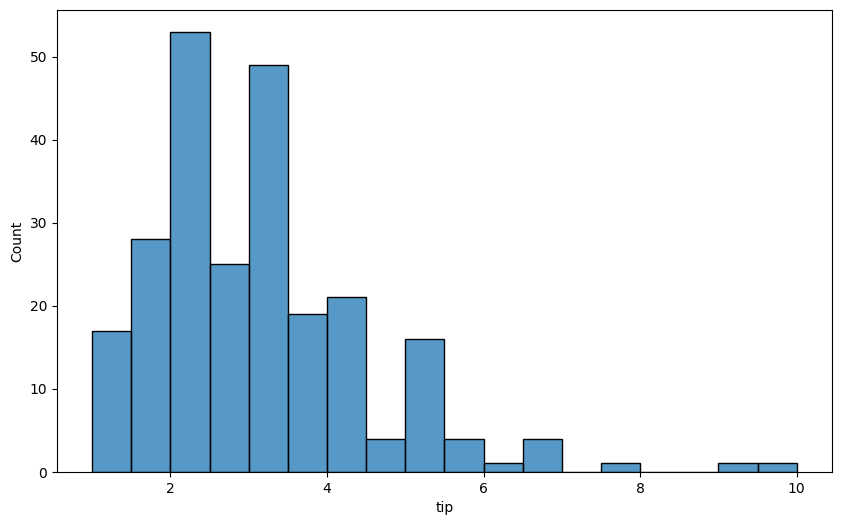

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df_b['tip'])

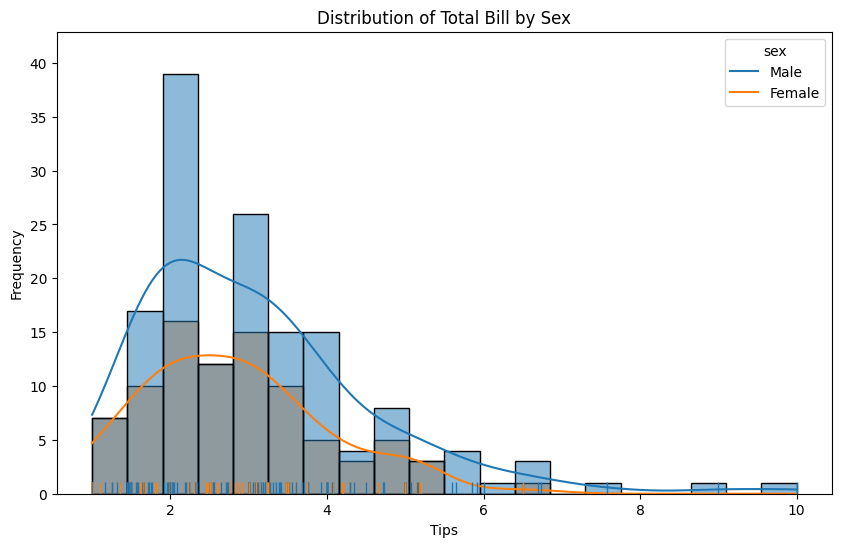

In [40]:
# adding color by sex, the kde (kernel density estimation, like a best fit curve),
# and break up the x axis into 50 bins, and then labeling for readability

plt.figure(figsize=(10, 6))
sns.histplot(data=df_b, x="tip", hue="sex", kde=True, bins=20)
sns.rugplot(data=df_b, x="tip", hue="sex")
plt.title("Distribution of Total Bill by Sex")
plt.xlabel("Tips")
plt.ylabel("Frequency")
plt.show()

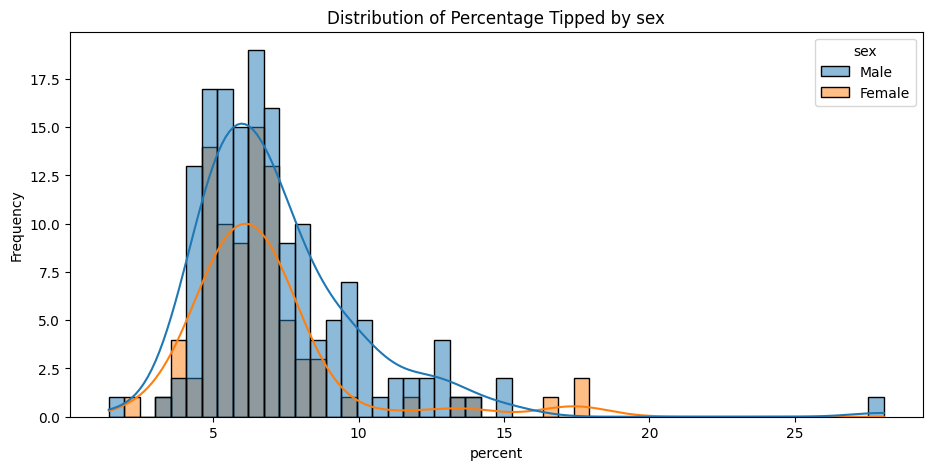

In [47]:
# looking at tips as a percentage of the total bill

df_b['percent'] = df_b['total_bill']/df_b['tip']

plt.figure(figsize=(11,5))
sns.histplot(data=df_b, x=df_b['percent'], kde=True, hue='sex',bins=50)

plt.title("Distribution of Percentage Tipped by sex")
plt.ylabel("Frequency")
plt.show()
# where KDE is kernel density estimation (best fit curve)
# rug has ticks that indicate frequency "||" = 2 observations

## box plots with seaborn

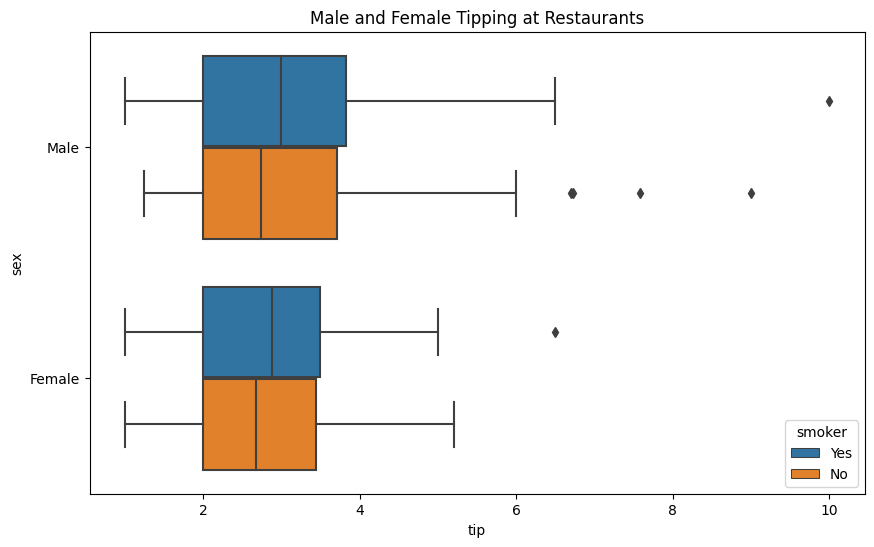

In [198]:
plt.figure(figsize=(10,6)) # establish property of the plot
sns.boxplot(y=df_b['sex'], x=df_b['tip'], orient='h', hue=df_b['smoker']).set(title="Male and Female Tipping at Restaurants")
plt.show()

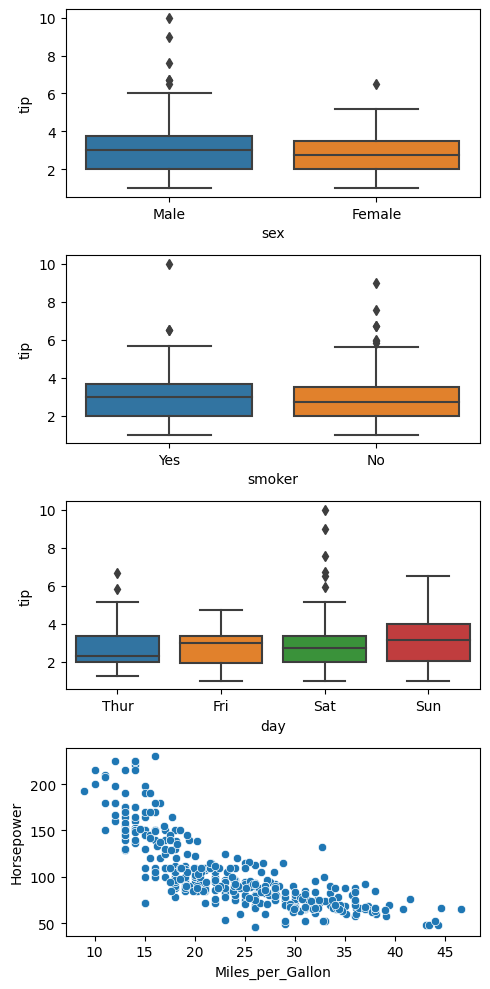

In [76]:
# way to get multiple plots, create the place for figure first

# fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows= 1,ncols=4, figsize(11,5)) # subplots(1,3) mean you want a 1 row by 3 columns

fig, (ax1, ax2, ax3,ax4)  = plt.subplots(nrows=4,ncols=1 , figsize = (5,10))


sns.boxplot(data = df_b, x="sex", y="tip", ax = ax1)
sns.boxplot(data = df_b, x="smoker", y="tip", ax = ax2)
sns.boxplot(data = df_b, x="day", y="tip", ax = ax3)
sns.scatterplot(x=df['Miles_per_Gallon'], y=df['Horsepower'], ax=ax4)

plt.tight_layout()

plt.show()


#Python 101

Python, was developed by Guido va Rossum and released around 1991.

It's variables can represent many things:

1. Number and words
2. Excel sheet formatted data (pandas)
3. Functions and Objects (python is OOP)


In [ ]:
# numerics

a = 3
b = 29
c = a+b
c

In [ ]:
# words

x = "Gasline is "
y = "cheap"
x+y

In [ ]:
# lists
# '[]' represents a list

word_list = ["i","am", "awake"]

two_lists = [[1,2,3,4,5], [9.3,5.4, 3.2, 23, 2.1]]

mixed_type_list = [['hello','there','welcome'], [3,2,6], ['about you', 'i love python', 'we are great @ learning']]

# print(two_lists)
print(mixed_type_list)

In [ ]:
# variables with logic

test_score = 65
if test_score > 84:
  print("A - Yay!")
elif (test_score <= 84):
  if (test_score <=65):
    print ("C - Redo!")
  else:
    print("B - Passed!")

In [ ]:
# loops with lists
# while loops, for loops, range() loops

mylist = ['tomato','lettuce','bread','avocado']

x = 1
while (x < 10):
  print(x, " is less than 10")
  x = x+1
print(x, " is now 10")

##########

for i in range(1,len(mylist)): # range() is a method and len()
  print(mylist[i])

# why do we have no TOMATO??   we have no tomato because the range starts from
# 1 and list elements are labeled starting with 0 index

# Pandas

Dataframes, aka excel sheets, google sheets, Numbers app for Mac users, allow us to easily understand and manipulate data sets.

- 1 Row = record
- 1 Column = attribute
- 1 cell = value

- convention to use "df" as dataframe or aka excel sheet

In [ ]:
# create a new dataframe
import pandas as pd

new_df = pd.DataFrame()

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame


## Getting data

... but before you can use a dataframe you'll need data from ...

In [ ]:
# get your data from Vega data, a popular repository made available for everyone
# that contains 20 something sets of data.

import pandas as pd
from vega_datasets import data

data.list_datasets() # what data sets are in vega_datasets?
len(data.list_datasets()) # how many was that?

df = data.cars()
df

In [ ]:
# get your data from a URL

import pandas as pd

url = "https://raw.githubusercontent.com/anjaleeDS/cs06/main/shopping_trends_updated.csv"
df = pd.read_csv(url)

df

In [ ]:
# get your data from your google drive
# this is ddirectly from google's codesnippet icon on the lower left
# icon looks like this: < >

import pandas as pd
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('Copy of BooksDataset').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
pd.DataFrame.from_records(rows)


In [ ]:
# open a file in your google drive
# also from the code snippet icon on the lower left
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')
%cd MyDrive/Cs 06 Winter Data Viz 2024/

filename = "BooksDataset.csv"
df = pd.read_csv(filename)
df

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
MyDrive/


In [ ]:
# open a file downloaded from Kaggle.com or any other dataset source that doesn't have a
# URL that has the data already in a *.csv file format

# NOT IN COLAB download file onto your computer, unzip file, and then upload it to google drive

import pandas as pd
from google.colab import drive

drive.mount("/gdrive", force_remount=True)
# drive.mount('/gdrive')
%cd /gdrive/MyDrive/Cs 06 Winter Data Viz 2024/covid dataset/

%ls

#(original files from https://www.kaggle.com/datasets/thedevastator/cdc-covid-19-vaccine-tracker?select=cdc_vaccines_distributed_administered_national_timeseries.csv)

Mounted at /gdrive
/gdrive/MyDrive/Cs 06 Winter Data Viz 2024/covid dataset
cdc_vaccines_distributed_administered_by_jurisdiction.csv
cdc_vaccines_distributed_administered_by_jurisdiction_timeseries.csv
cdc_vaccines_distributed_administered_national_timeseries.csv


## Looking at your data (aka data discovery)

Things you want to do with your data after getting it into a dataframe:

1. Look at it! 👁
- What type of data do you have?
- what are the statistics of the columns that have numbers only or are an integer/float type?
- what are the unique values in a column like "gender"?
-  do you  have any blanks? what are the number of blanks do you have for each column?
2. "Clean" it! 🧼
- are there columns that are the wrong type?  if yes, then change them!
- figure out what you want to do with the blanks? you can drop it, fill it with a fixed value, fill it with the value before or after it?

In [ ]:
import pandas as pd
from vega_datasets import data

# let's use the cars data set from vega_datasets
df = data.cars()
df

In [ ]:
# Data discovery

df.shape # Things without a () are called attributes, the are part of the df package
df.info() # Things with a () are called methods. they are not part of the package but the df package can use it with some input
df.size # how many cells are there in total or number of rows times number of columns


df.dtypes # what are the data type of each column, but df.info() will give you column name, column type, and memory needs and dtypes!

len(df.columns) # how many columns do we have again?
df.columns # getting a list of column names


df.head # look at the first few rows of your dataframe. df.tail gives the last few rows of your dataframe
df.tail(20) # adding a number tells head attribute to return back a specific number of rows from the bottom of the dataframe


df.isna().sum() # total number of na-s or NaNs by column
df.isnull().sum() # total number of nulls by column
df.isnull().sum().sum() # total number of nulls combined


In [ ]:

df.isna().sum() # total number of na-s or NaNs by column
df.isnull().sum() # total number of nulls by column
df.isnull().sum().sum() # total number of nulls combined


## Cleaning your data

2. "Clean" it! 🧼
- are there columns that are the wrong type?  if yes, then change them!
- figure out what you want to do with the blanks? you can drop it, fill it with a fixed value, fill it with the value before or after it?

In [ ]:
# LET'S CLEAN!

# Step 1: change headers to be callable in code.

# replace all spaces in headers into '_'
df.columns = df.columns.str.replace(' ', '_')

# change every letter into lower case for all values and headers
df.columns = df.columns.str.lower()
df = df.applymap(lambda x: x.lower())

# change columns to the right type
df.dtypes # check the column types. Does it match with what you think is the data type?

In [ ]:
# many analyses also make a copy of the data and then
# separate out the numerical from the categorical columns

# separate categorical and numerical features
num_df = df.select_dtypes(include=['int64','float64'])
cat_df = df.select_dtypes(exclude=['int64','float64'])

references by plot types:

[matplotlib](https://matplotlib.org/stable/plot_types/index.html)

[seaborn]()